#### Load the dataset

In [2]:
# Import the pandas, numpy packages and dump from joblib
import pandas as pd
import numpy as np
from joblib import dump

In [74]:
# Load the saved sets from data/processed using numpy
X_train = np.load('../data/processed/X_train.npy')
X_val   = np.load('../data/processed/X_val.npy'  )
y_train = np.load('../data/processed/y_train.npy')
y_val   = np.load('../data/processed/y_val.npy'  )

#### Train Random Forest Model

In [75]:
# Import the RandomForestClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

In [76]:
# Instantiate the RandomForestClassifier class called rf1 with a random state=8
rf1 = RandomForestClassifier(random_state=8)

In [77]:
# Fit the RandomForest model
rf1.fit(X_train, y_train)

RandomForestClassifier(random_state=8)

In [78]:
# Calculate the probability when target=1
probs_train=rf1.predict_proba(X_train)[:,1]
probs_val=rf1.predict_proba(X_val)[:,1]

In [3]:
# Import the roc_auc_score, roc_curve, matplotlib.pyplot
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [81]:
# Print the ROC AUC score for train and validation data
print(f'Train ROC AUC Score: {roc_auc_score(y_train, probs_train)}')
print(f'Val ROC AUC  Score: {roc_auc_score(y_val, probs_val)}')

Train ROC AUC Score: 1.0
Val ROC AUC  Score: 0.6740837144920558


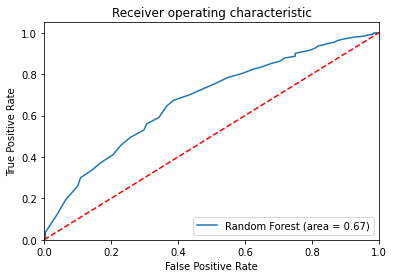

In [82]:
# Plot the roc_auc_score for validation data
rf_roc_auc = roc_auc_score(y_val, rf1.predict_proba(X_val)[:,1])
fpr, tpr, thresholds = roc_curve(y_val, rf1.predict_proba(X_val)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [83]:
# Get the parameter for existing model
rf1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 8,
 'verbose': 0,
 'warm_start': False}

#### Hyperparameter Tuning with Random Search

In [84]:
# Import randint from scipy.stats
from scipy.stats import randint

In [65]:
# Define the hyperparameters value randomly
hyperparams_dist = {
'n_estimators': randint(50, 200),
'max_depth': randint(5, 30),
'min_samples_leaf': randint(20,50)
}

In [66]:
# Import RandomizedSearchCV and KFold from sklearn.model_selection
from sklearn.model_selection import RandomizedSearchCV, KFold

In [67]:
# Instantiate a KFold with 5 splits
kf_cv = KFold(n_splits=5)

In [68]:
# Instantiate a RandomizedSearchCV with the hyperparameter values and the random forest model
random_search_rf1 = RandomizedSearchCV(rf1, hyperparams_dist, random_state=8, cv=kf_cv, verbose=1)

In [69]:
# Fit the RandomizedSearchCV on the training set
random_search_rf1.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(min_samples_leaf=50,
                                                    n_estimators=150, n_jobs=-1,
                                                    oob_score=True,
                                                    random_state=8),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002C4493D32E0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002C4460E9520>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002C44819B430>},
                   random_state=8, verbose=1)

In [85]:
# Display the best set of hyperparameters
random_search_rf1.best_params_

{'max_depth': 10, 'min_samples_leaf': 46, 'n_estimators': 186}

In [86]:
# Calculate the probabilitis for train and validation datasets
probs_train=random_search_rf1.predict_proba(X_train)[:,1]
probs_val=random_search_rf1.predict_proba(X_val)[:,1]

In [88]:
# Calculate the roc_auc_score for train and validation dataset
print(f'Random_Search_Train ROC AUC Score: {roc_auc_score(y_train, probs_train)}')
print(f'Random_Search_Val ROC AUC  Score: {roc_auc_score(y_val, probs_val)}')

Random_Search_Train ROC AUC Score: 0.7812034352902928
Random_Search_Val ROC AUC  Score: 0.706701372171401
